In [ ]:
import httpx
import os
cookies = {'session': os.environ['AOC_SESSION']}
res = httpx.get('https://adventofcode.com/2025/day/9/input', cookies=cookies)

In [ ]:
instructions = list(res.iter_lines())

In [ ]:
red_tile_locations = list(map(lambda x: list(map(int,      x.split(','))), instructions))

In [ ]:
sample_input = '''7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3'''.splitlines()


### Part 1

In [ ]:
from itertools import combinations

In [ ]:
def calculate_distance(x1,y1,x2,y2):
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

In [ ]:
red_tile_locations = list(map(lambda x: list(map(int,      x.split(','))), sample_input))


In [ ]:
max(combinations(red_tile_locations,2), key=lambda rt: calculate_distance(*rt[0], *rt[1]))
    

([11, 1], [2, 5])

In [ ]:
abs(2-11)*abs(5-1)

36

In [ ]:
11-2

9

In [ ]:
2-11

-9

In [ ]:
5-1

4

I think I might be doing something wrong.  The problem I am working on says that the area between 2,5 and 11,1 is 50 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Ah, this is a classic gotcha with grid problems! 

Think about a simpler case: if you have two points at x=2 and x=4, how many tiles are there in that row between them (including both endpoints)?

Is it `4-2 = 2` tiles, or something else?

I think it would be 3, right? 4,3,and2

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right! 🎉 

So the formula for counting tiles isn't `4-2`, it's `4-2+1`. This is sometimes called the "fence post" problem.

Can you apply that same logic to your area calculation for the points (2,5) and (11,1)?

In [ ]:
red_tile_locations = list(map(lambda x: list(map(int,      x.split(','))), instructions))

In [ ]:
max(combinations(red_tile_locations,2), key=lambda rt: calculate_distance(*rt[0], *rt[1]))

([83933, 85142], [16727, 14058])

Is there an easy way to get the area with these two points as opposite corners of a rectangle?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! Since you have two opposite corners of a rectangle, you can find the area by multiplying the width and height.

If your two points are `(x1, y1)` and `(x2, y2)`, then:
- Width = `abs(x2 - x1)`
- Height = `abs(y2 - y1)`
- Area = Width × Height

So for your result, you could do something like:

```python
abs(x2 - x1) * abs(y2 - y1)
```

Would you like to try writing the code to calculate this from your two points?

In [ ]:
(x1,y1),(x2,y2)=max(combinations(red_tile_locations,2), key=lambda rt: calculate_distance(*rt[0], *rt[1]))
(abs(x2 - x1)+1) * (abs(y2 - y1)+1)


4777409595


Does this look correct?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Nice work! You correctly applied the fence post fix with the `+1` on both dimensions.

Does it give you the right answer when you submit it to Advent of Code?

### Part 2

Can you remind me what calculating hulls look like in Python?  It has been quite a while since I have done something with these, but part two seems like it could be a good use-case. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Sure! For convex hulls in Python, the most common approach is using `scipy.spatial.ConvexHull`. 

The basic usage looks like:

```python
from scipy.spatial import ConvexHull
hull = ConvexHull(points)
```

Where `points` is a list or array of (x, y) coordinates (which you already have in `red_tile_locations`).

Some useful attributes of the hull object:
- `hull.vertices` — indices of the points that form the hull
- `hull.area` — the area enclosed (note: for 2D, this is actually in the `volume` attribute, confusingly!)

Would you like to try it out and see what you get? Let me know if you run into any issues or want to know more about any of the hull properties.

Can you remind me what a convex hull is?  I am pretty sure this is what I want for part 2 but I need a refresher

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

A convex hull is like stretching a rubber band around a set of points — it snaps to the outermost points and forms the smallest convex shape that contains all of them.

Imagine you hammered nails into a board at each of your point locations, then wrapped a rubber band around the outside. The shape it forms is the convex hull.

Key properties:
- Every point is either on the boundary or inside the hull
- The boundary has no "dents" (it only curves outward)
- It's the smallest convex polygon that encloses all the points

Does that help clarify? Would you like to see a quick visualization of your points and their hull, or are you ready to try applying it to part 2?

A visualization might be nice.  

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great idea! You can use matplotlib to plot this. Here's the general approach:

1. Scatter plot all your `red_tile_locations`
2. Compute the hull with `ConvexHull`
3. Plot the hull boundary by connecting the vertices

Would you like to try writing this yourself, or would you prefer I give you the code for the visualization?

Please write this for me. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠

```python
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

points = np.array(red_tile_locations)
hull = ConvexHull(points)

plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], s=1, label='Points')

# Plot the hull boundary (close the loop by appending the first vertex)
hull_vertices = np.append(hull.vertices, hull.vertices[0])
plt.plot(points[hull_vertices, 0], points[hull_vertices, 1], 'r-', linewidth=2, label='Convex Hull')

plt.legend()
plt.title('Red Tile Locations and Convex Hull')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
```

Give that a try and let me know what you see!

In [ ]:
red_tile_locations = list(map(lambda x: list(map(int,      x.split(','))), sample_input))


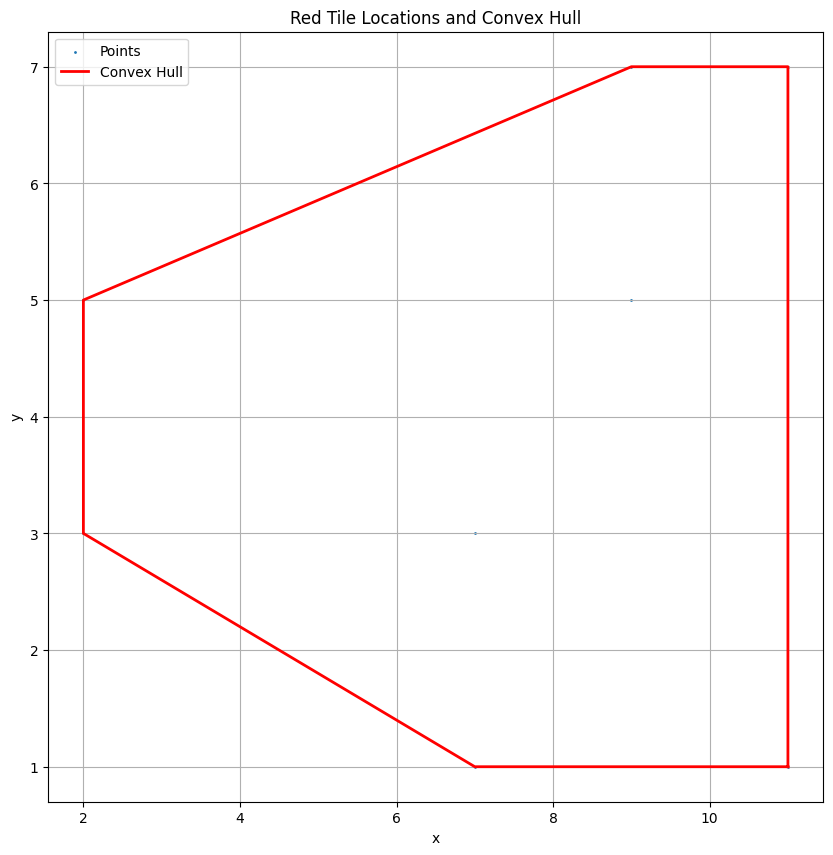

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

points = np.array(red_tile_locations)
hull = ConvexHull(points)

plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], s=1, label='Points')

# Plot the hull boundary (close the loop by appending the first vertex)
hull_vertices = np.append(hull.vertices, hull.vertices[0])
plt.plot(points[hull_vertices, 0], points[hull_vertices, 1], 'r-', linewidth=2, label='Convex Hull')

plt.legend()
plt.title('Red Tile Locations and Convex Hull')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


Ok, this actually isn't quite what I am looking for.  I want something that draws a line tightly around every point in the graph like a dot-to-dot would do. Then I need to figure out what the largest rectangle I can make without going outside of those bounds is. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Ah, I see! So you want to connect the points in the order they appear in the input (like drawing a polygon by connecting each point to the next), rather than finding the outer convex boundary.

That would make the polygon follow the exact path defined by your input data — which looking at your sample input, probably traces out an irregular shape with indentations.

Is that right? If so, should the last point also connect back to the first point to close the polygon?

Yes, it should connect back to the first point

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Got it! To plot the points connected in order as a closed polygon, you just need to:

1. Plot lines connecting the points in the order they appear in `red_tile_locations`
2. Add one more line segment from the last point back to the first

Can you try modifying the plot code? The key change is using the actual point order instead of `hull_vertices`. You'll want to append the first point to the end of your points array to close the loop.

Give it a try and let me know if you get stuck!

I want to get a better plan figured out before drawing the graph.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Smart approach! Let's think through the problem step by step.

From what you've described, it sounds like you need to:

1. **Define the polygon** — connect the points in order (including back to the first point) to form a closed shape
2. **Find the largest axis-aligned rectangle** that fits entirely inside that polygon

Is that the right understanding of the problem? And do you know if the rectangle needs to be axis-aligned (sides parallel to x and y axes), or can it be rotated?

Your understanding is correct.  The rectangle must be axis-aligned. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great! Finding the largest axis-aligned rectangle inside an arbitrary polygon is a classic computational geometry problem.

A couple of approaches come to mind:

1. **Grid-based approach**: Create a grid, mark which cells are inside the polygon, then find the largest rectangle of "inside" cells
2. **Analytical approach**: Use the polygon edges and vertices to determine candidate rectangle boundaries

Do you have a sense of which direction you'd like to explore? Also, roughly how many points are in your full input? That might influence which approach is practical.

Well for the first problem, I used `max(combinations(red_tile_locations,2), key=lambda rt: calculate_distance(*rt[0], *rt[1]))` when the rectangle didn't need to befully inside the polygon. Is there a nice way to modify this to provide the answer we are looking for?  I guess we would need the polygon to start and maybe we could apply a convolution to see if all the points are inside the grid.  If there is an easier way, please let me know


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That's a reasonable starting point! Using pairs of points as potential opposite corners of the rectangle could work.

The tricky part is checking whether the entire rectangle is inside the polygon. Just checking the 4 corners isn't enough for a concave polygon (one with indentations) — the rectangle's edges could cross the polygon boundary even if the corners are inside.

There's a library called `shapely` that makes polygon operations much easier. It has:
- `Polygon` objects you can create from your points
- A `.contains()` method to check if one shape is fully inside another
- Easy ways to create rectangles from corner coordinates

Would you like to explore using `shapely` to handle the geometry checks? Or would you prefer to work out the "is rectangle inside polygon" logic yourself?

Let's work out that logic ourselves

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great! Let's break this down. To check if a rectangle is fully inside your polygon, what do you think we need to verify?

Think about it this way: if you drew the rectangle on paper over the polygon, what conditions would make the rectangle "safe" (fully inside)?

No intersections between the rectangle and any of the line segments of the polygon?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That's definitely part of it! No intersections between the rectangle edges and polygon edges is necessary.

But is that sufficient? Consider this: what if your rectangle is completely outside the polygon with no intersections? That would pass the "no intersections" test but wouldn't be valid.

So you'd need one more check. What might that be?

All of the points must be contained without the polygon (I'm not sure how to test for that)

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right! You need:
1. No intersections between rectangle edges and polygon edges
2. At least one point of the rectangle is inside the polygon (if there are no intersections and one corner is inside, then all corners must be inside)

For the "point inside polygon" test, the classic algorithm is called **ray casting**:

- Draw an imaginary ray from your point going in any direction (usually straight right along the x-axis)
- Count how many times it crosses the polygon boundary
- **Odd** number of crossings → point is **inside**
- **Even** number of crossings → point is **outside**

Think about why this works: if you're inside a closed shape and walk in a straight line, you must cross the boundary to get out. If you cross again, you're back inside, and so on.

Does that make sense? Would you like to try implementing the ray casting check first, or the line intersection check?

I am not sure. I am getting pretty lost on this approach

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

No worries — this is genuinely a tricky problem! Let's take a step back.

A few options from here:

1. **Simplify**: Would you like me to write out the helper functions (ray casting, line intersection) so you can focus on the main logic?

2. **Different approach**: We could try the grid-based approach instead, which might be more intuitive — mark all points inside the polygon on a grid, then find the largest rectangle of marked cells.

3. **Use a library**: `shapely` handles all this geometry for us and would let you focus on the algorithm rather than the math.

Which sounds most appealing to you? Or is there another direction you'd like to go?

Go ahead and write out the helper functions and give me the pseudo-code and then I will try to pull it all together.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Here are the helper functions:

```python
def point_in_polygon(px, py, polygon):
    """Ray casting algorithm - returns True if point (px, py) is inside polygon"""
    n = len(polygon)
    inside = False
    
    x1, y1 = polygon[0]
    for i in range(1, n + 1):
        x2, y2 = polygon[i % n]
        if py > min(y1, y2):
            if py <= max(y1, y2):
                if px <= max(x1, x2):
                    if y1 != y2:
                        x_intersect = (py - y1) * (x2 - x1) / (y2 - y1) + x1
                    if y1 == y2 or px <= x_intersect:
                        inside = not inside
        x1, y1 = x2, y2
    
    return inside


def segments_intersect(ax1, ay1, ax2, ay2, bx1, by1, bx2, by2):
    """Returns True if line segment A (ax1,ay1)-(ax2,ay2) intersects segment B (bx1,by1)-(bx2,by2)"""
    def ccw(px1, py1, px2, py2, px3, py3):
        """Check if three points are counterclockwise"""
        return (py3 - py1) * (px2 - px1) > (py2 - py1) * (px3 - px1)
    
    return (ccw(ax1, ay1, bx1, by1, bx2, by2) != ccw(ax2, ay2, bx1, by1, bx2, by2) and
            ccw(ax1, ay1, ax2, ay2, bx1, by1) != ccw(ax1, ay1, ax2, ay2, bx2, by2))


def rect_edges(x1, y1, x2, y2):
    """Returns the 4 edges of a rectangle given opposite corners"""
    # Returns list of ((start_x, start_y), (end_x, end_y)) for each edge
    return [
        (x1, y1, x2, y1),  # bottom
        (x2, y1, x2, y2),  # right
        (x2, y2, x1, y2),  # top
        (x1, y2, x1, y1),  # left
    ]
```

And here's the pseudo-code for the main algorithm:

```
1. Build list of polygon edges from red_tile_locations (each consecutive pair of points, plus last→first)

2. For each pair of points (p1, p2) in red_tile_locations:
   a. Treat them as opposite corners of a candidate rectangle
   b. Check if ANY corner of the rectangle is inside the polygon
   c. Check if ANY rectangle edge intersects ANY polygon edge
   d. If corner is inside AND no intersections → it's a valid rectangle, calculate its area

3. Return the maximum valid area found
```

Give it a try pulling these together! Let me know if any part is confusing.

In [ ]:
def point_in_polygon(px, py, polygon):
    """Ray casting algorithm - returns True if point (px, py) is inside polygon"""
    n = len(polygon)
    inside = False
    
    x1, y1 = polygon[0]
    for i in range(1, n + 1):
        x2, y2 = polygon[i % n]
        if py > min(y1, y2):
            if py <= max(y1, y2):
                if px <= max(x1, x2):
                    if y1 != y2:
                        x_intersect = (py - y1) * (x2 - x1) / (y2 - y1) + x1
                    if y1 == y2 or px <= x_intersect:
                        inside = not inside
        x1, y1 = x2, y2
    
    return inside


def segments_intersect(ax1, ay1, ax2, ay2, bx1, by1, bx2, by2):
    """Returns True if line segment A (ax1,ay1)-(ax2,ay2) intersects segment B (bx1,by1)-(bx2,by2)"""
    def ccw(px1, py1, px2, py2, px3, py3):
        """Check if three points are counterclockwise"""
        return (py3 - py1) * (px2 - px1) > (py2 - py1) * (px3 - px1)
    
    return (ccw(ax1, ay1, bx1, by1, bx2, by2) != ccw(ax2, ay2, bx1, by1, bx2, by2) and
            ccw(ax1, ay1, ax2, ay2, bx1, by1) != ccw(ax1, ay1, ax2, ay2, bx2, by2))


def rect_edges(x1, y1, x2, y2):
    """Returns the 4 edges of a rectangle given opposite corners"""
    # Returns list of ((start_x, start_y), (end_x, end_y)) for each edge
    return [
        (x1, y1, x2, y1),  # bottom
        (x2, y1, x2, y2),  # right
        (x2, y2, x1, y2),  # top
        (x1, y2, x1, y1),  # left
    ]

In [ ]:
# 1. Build list of polygon edges from red_tile_locations (each consecutive pair of points, plus last→first)

red_tile_polygon = red_tile_locations+[red_tile_locations[0]]

Can you help me graph this?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Sure! Would you like me to write the plotting code for you, or would you prefer a hint to try it yourself first?

Just write the plotting code for me

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
plt.figure(figsize=(10, 10))

# Extract x and y coordinates
x_coords = [p[0] for p in red_tile_polygon]
y_coords = [p[1] for p in red_tile_polygon]

# Plot the polygon
plt.plot(x_coords, y_coords, 'r-', linewidth=2, label='Polygon')
plt.scatter([p[0] for p in red_tile_locations], [p[1] for p in red_tile_locations], s=50, label='Points')

plt.legend()
plt.title('Red Tile Polygon')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.show()
```

Give that a try!

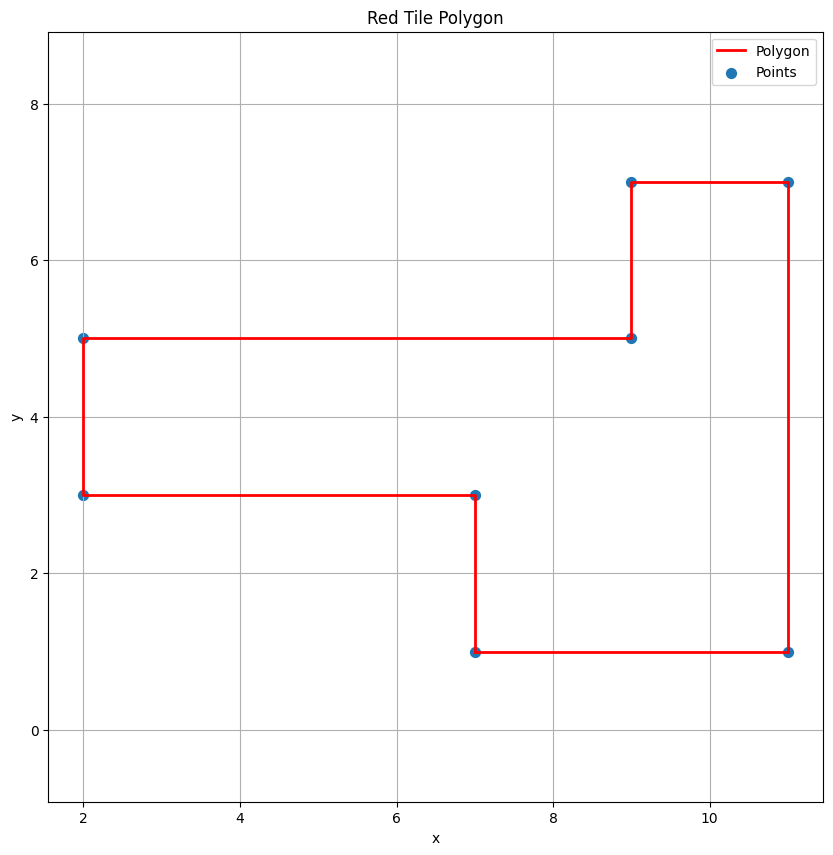

In [ ]:
plt.figure(figsize=(10, 10))

# Extract x and y coordinates
x_coords = [p[0] for p in red_tile_polygon]
y_coords = [p[1] for p in red_tile_polygon]

# Plot the polygon
plt.plot(x_coords, y_coords, 'r-', linewidth=2, label='Polygon')
plt.scatter([p[0] for p in red_tile_locations], [p[1] for p in red_tile_locations], s=50, label='Points')

plt.legend()
plt.title('Red Tile Polygon')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
%%
1. Build list of polygon edges from red_tile_locations (each consecutive pair of points, plus last→first)

2. For each pair of points (p1, p2) in red_tile_locations:
   a. Treat them as opposite corners of a candidate rectangle
   b. Check if ANY corner of the rectangle is inside the polygon
   c. Check if ANY rectangle edge intersects ANY polygon edge
   d. If corner is inside AND no intersections → it's a valid rectangle, calculate its area

3. Return the maximum valid area found

In [ ]:
for rt0, rt1 in combinations(red_tile_polygon,2):
    ;

In [ ]:
point_in_polygon??


```python
def point_in_polygon(px, py, polygon):
    """Ray casting algorithm - returns True if point (px, py) is inside polygon"""
    n = len(polygon)
    inside = False

    x1, y1 = polygon[0]
    for i in range(1, n + 1):
        x2, y2 = polygon[i % n]
        if py > min(y1, y2):
            if py <= max(y1, y2):
                if px <= max(x1, x2):
                    if y1 != y2:
                        x_intersect = (py - y1) * (x2 - x1) / (y2 - y1) + x1
                    if y1 == y2 or px <= x_intersect:
                        inside = not inside
        x1, y1 = x2, y2

    return inside
```

**File:** `/tmp/ipykernel_533/4223861068.py`

In [ ]:
i=0
for rt0,rt1 in combinations(red_tile_polygon,2):    
    if point_in_polygon(*rt0, red_tile_polygon): i+=1; break
    if point_in_polygon(*rt1, red_tile_polygon): i+=1; break 
    if point_in_polygon(rt0[0],rt1[1], red_tile_polygon): i+=1; break
    if point_in_polygon(rt1[0],rt0[1], red_tile_polygon): i+=1; break 
    if i==0: print("No True")

No True


It looks like we are never having any point_in_polygon return True. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good catch! There's likely an issue with testing points that lie exactly on the polygon boundary. The vertices of your polygon are ON the boundary, and ray casting algorithms can be unreliable for points exactly on edges.

Try testing with a point that's clearly inside the polygon to verify the function works:

```python
point_in_polygon(8, 4, red_tile_polygon)  # Should be inside based on the graph
```

Does that return `True`?

The points I am most interested in are going to most likely be at the boundary so I can check, but the outcome seems not useful

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You're right — that's a real limitation of this approach. Since the candidate rectangle corners come from polygon vertices, they'll always be on the boundary where ray casting is unreliable.

Here's a workaround: instead of checking if a *corner* is inside, check if the *center* of the candidate rectangle is inside. If the center is inside and there are no edge intersections, the rectangle is valid.

The center of a rectangle with corners `(x1, y1)` and `(x2, y2)` would be:
```python
center_x = (x1 + x2) / 2
center_y = (y1 + y2) / 2
```

Does that make sense? Want to try modifying your loop to check the center instead?

I am open to it, but I'm getting frustrated at the moment. Can we make sure that we are solving this in a way that makes sense? I want you to write the helper functions and the pseudo-code and then I will stitch these together.  So far, I have been trying to stitch things together and the helper functions aren't ready for me. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You're absolutely right, and I apologize for the frustration. Let me give you a complete, well-thought-out set of helper functions and pseudo-code.

```python
def point_in_polygon(px, py, polygon):
    """Ray casting algorithm - returns True if point (px, py) is inside polygon"""
    n = len(polygon)
    inside = False
    
    x1, y1 = polygon[0]
    for i in range(1, n + 1):
        x2, y2 = polygon[i % n]
        if py > min(y1, y2):
            if py <= max(y1, y2):
                if px <= max(x1, x2):
                    if y1 != y2:
                        x_intersect = (py - y1) * (x2 - x1) / (y2 - y1) + x1
                    if y1 == y2 or px <= x_intersect:
                        inside = not inside
        x1, y1 = x2, y2
    
    return inside


def segments_intersect(ax1, ay1, ax2, ay2, bx1, by1, bx2, by2):
    """Returns True if segment A strictly crosses segment B (not just touches)"""
    def sign(x):
        if x > 0: return 1
        if x < 0: return -1
        return 0
    
    def cross(ox, oy, ax, ay, bx, by):
        return (ax - ox) * (by - oy) - (ay - oy) * (bx - ox)
    
    d1 = sign(cross(bx1, by1, bx2, by2, ax1, ay1))
    d2 = sign(cross(bx1, by1, bx2, by2, ax2, ay2))
    d3 = sign(cross(ax1, ay1, ax2, ay2, bx1, by1))
    d4 = sign(cross(ax1, ay1, ax2, ay2, bx2, by2))
    
    if d1 * d2 < 0 and d3 * d4 < 0:
        return True
    return False


def get_polygon_edges(polygon):
    """Returns list of edges as (x1, y1, x2, y2) tuples"""
    edges = []
    n = len(polygon)
    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % n]
        edges.append((x1, y1, x2, y2))
    return edges


def get_rect_edges(x1, y1, x2, y2):
    """Returns the 4 edges of a rectangle given opposite corners"""
    min_x, max_x = min(x1, x2), max(x1, x2)
    min_y, max_y = min(y1, y2), max(y1, y2)
    return [
        (min_x, min_y, max_x, min_y),  # bottom
        (max_x, min_y, max_x, max_y),  # right
        (max_x, max_y, min_x, max_y),  # top
        (min_x, max_y, min_x, min_y),  # left
    ]


def is_valid_rectangle(x1, y1, x2, y2, polygon, polygon_edges):
    """Check if rectangle with opposite corners (x1,y1) and (x2,y2) is inside polygon"""
    # Check center is inside polygon
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    if not point_in_polygon(center_x, center_y, polygon):
        return False
    
    # Check no rectangle edge crosses any polygon edge
    rect_edges = get_rect_edges(x1, y1, x2, y2)
    for rx1, ry1, rx2, ry2 in rect_edges:
        for px1, py1, px2, py2 in polygon_edges:
            if segments_intersect(rx1, ry1, rx2, ry2, px1, py1, px2, py2):
                return False
    
    return True


def rect_area(x1, y1, x2, y2):
    """Calculate area of rectangle (using fence-post +1 for grid tiles)"""
    return (abs(x2 - x1) + 1) * (abs(y2 - y1) + 1)
```

And here's the pseudo-code:

```
1. Build polygon_edges using get_polygon_edges(red_tile_locations)

2. Initialize max_area = 0

3. For each pair of points (p1, p2) in combinations(red_tile_locations, 2):
   a. If is_valid_rectangle(p1[0], p1[1], p2[0], p2[1], red_tile_locations, polygon_edges):
      b. area = rect_area(p1[0], p1[1], p2[0], p2[1])
      c. If area > max_area: max_area = area

4. Return max_area
```

This should be ready for you to stitch together now. Let me know if anything is unclear!

In [ ]:
from functools import lru_cache

# Convert polygon to tuple so it's hashable for caching
red_tile_locations_tuple = tuple(tuple(p) for p in red_tile_locations)

@lru_cache(maxsize=10000)
def point_in_polygon(px, py, polygon):
    """Ray casting algorithm - returns True if point (px, py) is inside polygon"""
    n = len(polygon)
    inside = False
    
    x1, y1 = polygon[0]
    for i in range(1, n + 1):
        x2, y2 = polygon[i % n]
        if py > min(y1, y2):
            if py <= max(y1, y2):
                if px <= max(x1, x2):
                    if y1 != y2:
                        x_intersect = (py - y1) * (x2 - x1) / (y2 - y1) + x1
                    if y1 == y2 or px <= x_intersect:
                        inside = not inside
        x1, y1 = x2, y2
    
    return inside


def segments_intersect(ax1, ay1, ax2, ay2, bx1, by1, bx2, by2):
    """Returns True if segment A strictly crosses segment B (not just touches)"""
    def sign(x):
        if x > 0: return 1
        if x < 0: return -1
        return 0
    
    def cross(ox, oy, ax, ay, bx, by):
        return (ax - ox) * (by - oy) - (ay - oy) * (bx - ox)
    
    d1 = sign(cross(bx1, by1, bx2, by2, ax1, ay1))
    d2 = sign(cross(bx1, by1, bx2, by2, ax2, ay2))
    d3 = sign(cross(ax1, ay1, ax2, ay2, bx1, by1))
    d4 = sign(cross(ax1, ay1, ax2, ay2, bx2, by2))
    
    if d1 * d2 < 0 and d3 * d4 < 0:
        return True
    return False


def get_polygon_edges(polygon):
    """Returns list of edges as (x1, y1, x2, y2) tuples"""
    edges = []
    n = len(polygon)
    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % n]
        edges.append((x1, y1, x2, y2))
    return edges


def get_rect_edges(x1, y1, x2, y2):
    """Returns the 4 edges of a rectangle given opposite corners"""
    min_x, max_x = min(x1, x2), max(x1, x2)
    min_y, max_y = min(y1, y2), max(y1, y2)
    return [
        (min_x, min_y, max_x, min_y),  # bottom
        (max_x, min_y, max_x, max_y),  # right
        (max_x, max_y, min_x, max_y),  # top
        (min_x, max_y, min_x, min_y),  # left
    ]


def is_valid_rectangle(x1, y1, x2, y2, polygon, polygon_edges):
    """Check if rectangle with opposite corners (x1,y1) and (x2,y2) is inside polygon"""
    min_x, max_x = min(x1, x2), max(x1, x2)
    min_y, max_y = min(y1, y2), max(y1, y2)
    
    # Small offset to check just inside each corner (avoids boundary issues)
    eps = 0.0001
    corners = [
        (min_x + eps, min_y + eps),
        (max_x - eps, min_y + eps),
        (max_x - eps, max_y - eps),
        (min_x + eps, max_y - eps),
    ]
    
    # Check all corners are inside
    for cx, cy in corners:
        if not point_in_polygon(cx, cy, polygon):
            return False
    
    # Check no rectangle edge crosses any polygon edge
    rect_edges = get_rect_edges(x1, y1, x2, y2)
    for rx1, ry1, rx2, ry2 in rect_edges:
        for px1, py1, px2, py2 in polygon_edges:
            if segments_intersect(rx1, ry1, rx2, ry2, px1, py1, px2, py2):
                return False
    
    return True

def rect_area(x1, y1, x2, y2):
    """Calculate area of rectangle (using fence-post +1 for grid tiles)"""
    return (abs(x2 - x1) + 1) * (abs(y2 - y1) + 1)

In [ ]:
%%
1. Build polygon_edges using get_polygon_edges(red_tile_locations)

2. Initialize max_area = 0

3. For each pair of points (p1, p2) in combinations(red_tile_locations, 2):
   a. If is_valid_rectangle(p1[0], p1[1], p2[0], p2[1], red_tile_locations, polygon_edges):
      b. area = rect_area(p1[0], p1[1], p2[0], p2[1])
      c. If area > max_area: max_area = area

4. Return max_area

In [ ]:
# Test setup - using the sample polygon
test_polygon = ((7,1), (11,1), (11,7), (9,7), (9,5), (2,5), (2,3), (7,3))
test_edges = get_polygon_edges(test_polygon)

# Test point_in_polygon
print("=== point_in_polygon tests ===")
print(f"(8, 4) inside: {point_in_polygon(8, 4, test_polygon)} — expected True")
print(f"(10, 6) inside: {point_in_polygon(10, 6, test_polygon)} — expected True")
print(f"(3, 4) inside: {point_in_polygon(3, 4, test_polygon)} — expected True")
print(f"(0, 0) inside: {point_in_polygon(0, 0, test_polygon)} — expected False")
print(f"(5, 6) inside: {point_in_polygon(5, 6, test_polygon)} — expected False")
print(f"(3, 2) inside: {point_in_polygon(3, 2, test_polygon)} — expected False")

# Test segments_intersect
print("\n=== segments_intersect tests ===")
print(f"Crossing segments: {segments_intersect(0, 0, 10, 10, 0, 10, 10, 0)} — expected True")
print(f"Parallel segments: {segments_intersect(0, 0, 10, 0, 0, 5, 10, 5)} — expected False")
print(f"Non-crossing: {segments_intersect(0, 0, 5, 5, 6, 6, 10, 10)} — expected False")

# Test is_valid_rectangle with sample polygon
print("\n=== is_valid_rectangle tests ===")
print(f"(9,5)-(11,7) valid: {is_valid_rectangle(9, 5, 11, 7, test_polygon, test_edges)} — expected True")
print(f"(2,3)-(7,5) valid: {is_valid_rectangle(2, 3, 7, 5, test_polygon, test_edges)} — expected True")
print(f"(2,3)-(11,7) valid: {is_valid_rectangle(2, 3, 11, 7, test_polygon, test_edges)} — expected False (spans notch)")


=== point_in_polygon tests ===
(8, 4) inside: True — expected True
(10, 6) inside: True — expected True
(3, 4) inside: True — expected True
(0, 0) inside: False — expected False
(5, 6) inside: False — expected False
(3, 2) inside: False — expected False

=== segments_intersect tests ===
Crossing segments: True — expected True
Parallel segments: False — expected False
Non-crossing: False — expected False

=== is_valid_rectangle tests ===
(9,5)-(11,7) valid: True — expected True
(2,3)-(7,5) valid: True — expected True
(2,3)-(11,7) valid: False — expected False (spans notch)


In [ ]:
red_tile_locations = list(map(lambda x: list(map(int,      x.split(','))), sample_input))
red_tile_locations_tuple = tuple(tuple(p) for p in red_tile_locations)

In [ ]:
red_tile_polygon_edges = get_polygon_edges(red_tile_locations_tuple)
max_area=0
for rt0,rt1 in combinations(red_tile_locations,2):
    if is_valid_rectangle(*rt0, *rt1, red_tile_locations_tuple, red_tile_polygon_edges):
        area = rect_area(*rt0, *rt1)
        if area > max_area: max_area = area
max_area


24

In [ ]:
red_tile_locations = list(map(lambda x: list(map(int,      x.split(','))), instructions))
red_tile_locations_tuple = tuple(tuple(p) for p in red_tile_locations)


In [ ]:
red_tile_polygon_edges = get_polygon_edges(red_tile_locations_tuple)
max_area=0
for rt0,rt1 in combinations(red_tile_locations,2):
    if is_valid_rectangle(*rt0, *rt1, red_tile_locations_tuple, red_tile_polygon_edges):
        area = rect_area(*rt0, *rt1)
        if area > max_area: max_area = area
max_area


1473551379

In [ ]:
len(red_tile_locations)

496

In [ ]:
len(combinations(red_tile_locations,2))

TypeError: object of type 'itertools.combinations' has no len()

Can you help me figure out how many iterations this would have?  My computer is taking a long time to run it and I'm thinking we might need to optimize. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

With 496 points, the number of pairs is:

```python
496 * 495 // 2
```

That's 122,760 pairs. And for each pair, you're checking `point_in_polygon` which loops through all 496 polygon edges, plus the segment intersection checks. So you're looking at roughly 122,760 × 496 = ~60 million operations just for the point-in-polygon checks.

That's a lot! Some options to optimize:

1. **Early exit**: The current code already returns `False` as soon as a corner fails — that's good.

2. **Quick bounding box check first**: Before doing the expensive point-in-polygon checks, you could quickly reject rectangles that are obviously too big (e.g., if the rectangle extends beyond the polygon's bounding box).

3. **Different algorithm**: Instead of checking all pairs of input points, maybe the problem has a structure that allows a smarter approach. 

What does Part 2 actually ask for? Is it definitely looking for the largest rectangle, or is there something specific about which corners to use? Sometimes AoC problems have a trick that avoids brute force.

Can we add some caching as well?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! You can cache the `point_in_polygon` results since you'll be checking the same points multiple times. Here's how:

```python
from functools import lru_cache

# Convert polygon to tuple so it's hashable for caching
polygon_tuple = tuple(tuple(p) for p in red_tile_locations)

@lru_cache(maxsize=10000)
def point_in_polygon_cached(px, py, polygon_tuple):
    """Cached version of point_in_polygon"""
    polygon = [list(p) for p in polygon_tuple]
    n = len(polygon)
    inside = False
    
    x1, y1 = polygon[0]
    for i in range(1, n + 1):
        x2, y2 = polygon[i % n]
        if py > min(y1, y2):
            if py <= max(y1, y2):
                if px <= max(x1, x2):
                    if y1 != y2:
                        x_intersect = (py - y1) * (x2 - x1) / (y2 - y1) + x1
                    if y1 == y2 or px <= x_intersect:
                        inside = not inside
        x1, y1 = x2, y2
    
    return inside
```

Then update `is_valid_rectangle` to use `point_in_polygon_cached(cx, cy, polygon_tuple)` instead of `point_in_polygon(cx, cy, polygon)`.

This should give you a significant speedup since many rectangle corners will be at the same coordinates with the small epsilon offset!